#Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Getting Information about the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Inter/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

We have 21 columns with 2 as float and rest  are in int 64.We don't have any string values in our dataset.

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Unit of measurment is diffrent for most of the columns , So we have to nprmalise our data to ensure that every column is affecting the result in same amount

In [ ]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

No null values are present.

#EDA and Visulisation

In [ ]:
df['battery_power'].value_counts()

1589    6
618     6
1872    6
1379    5
1310    5
       ..
1072    1
1073    1
1074    1
1075    1
1998    1
Name: battery_power, Length: 1094, dtype: int64

In [ ]:
m=df['battery_power'].min()
mx=df['battery_power'].max()
print(m)
print(mx)

501
1998


In [ ]:
df.loc[(df['battery_power']>500) & (df['battery_power']<600)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0
17,595,0,0.9,1,7,1,23,0.1,121,3,17,441,810,3752,10,2,18,1,1,0,3
24,503,0,1.2,1,5,1,8,0.4,111,3,13,201,1245,2583,11,0,12,1,0,0,1
26,519,1,1.6,1,7,1,51,0.3,132,4,19,550,645,3763,16,1,4,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,590,1,1.2,1,0,0,32,0.4,141,6,1,227,509,1817,10,0,6,0,1,0,0
1956,555,1,0.5,1,2,0,17,0.2,163,5,12,956,1010,343,19,14,3,0,1,1,0
1971,538,0,1.1,1,0,1,25,0.3,163,7,7,455,537,2215,9,3,17,1,1,1,1
1989,586,0,2.8,0,2,0,15,0.2,83,3,11,241,854,2592,12,8,3,0,0,0,1


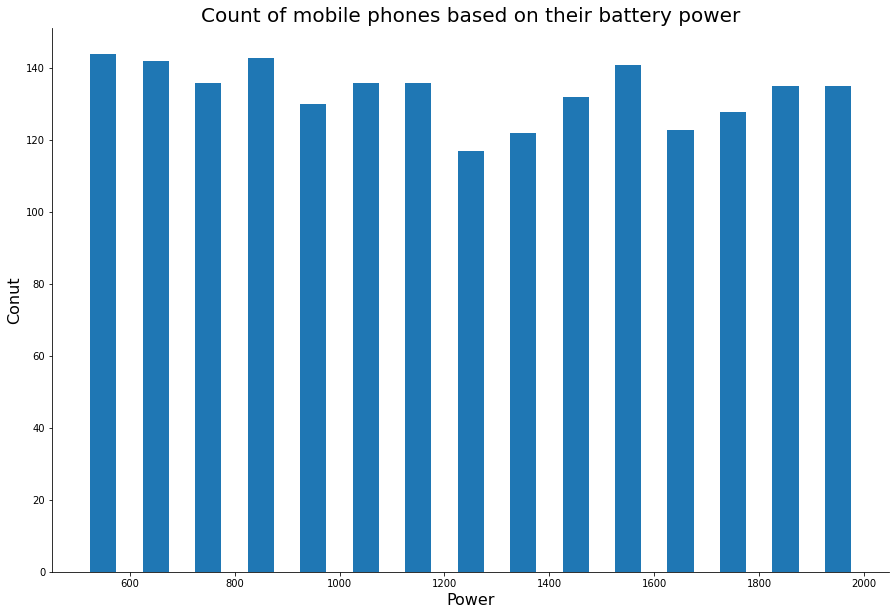

In [ ]:
battery=[0]*15
for i in df['battery_power']:
  battery[(i//100)-5]+=1
x=[500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000]
fig, ax = plt.subplots(figsize =(15,10))
ax.set_title('Count of mobile phones based on their battery power',fontsize=20)
ax.set_xlabel('Power',fontsize=16)
ax.set_ylabel('Conut',fontsize=16)
ax.hist(df['battery_power'],bins=[100*i for i in range(5,21)],rwidth=0.5)
sns.despine()

We have nearly even number of mobile phones for all the power ranges.

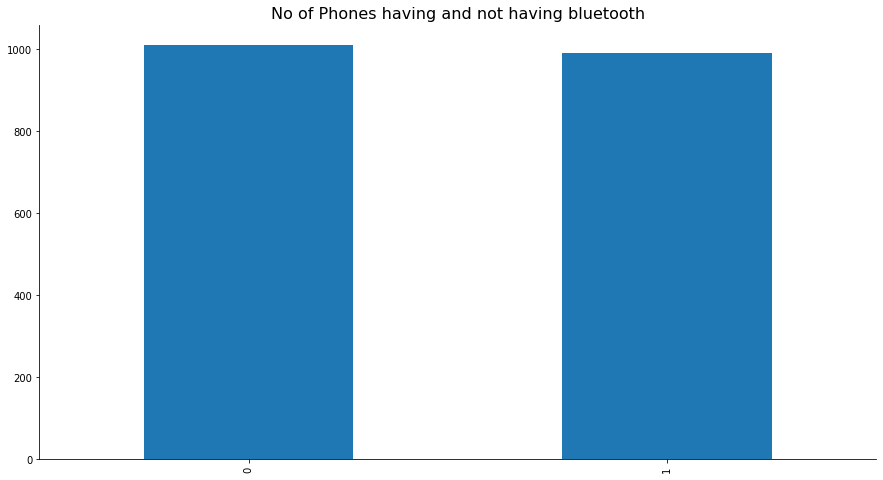

In [ ]:
plt.title('No of Phones having and not having bluetooth',fontsize=16)
df['blue'].value_counts().plot(kind='bar',sort_columns=True,figsize=(15,8))
sns.despine()

0    1010
1     990
Name: blue, dtype: int64


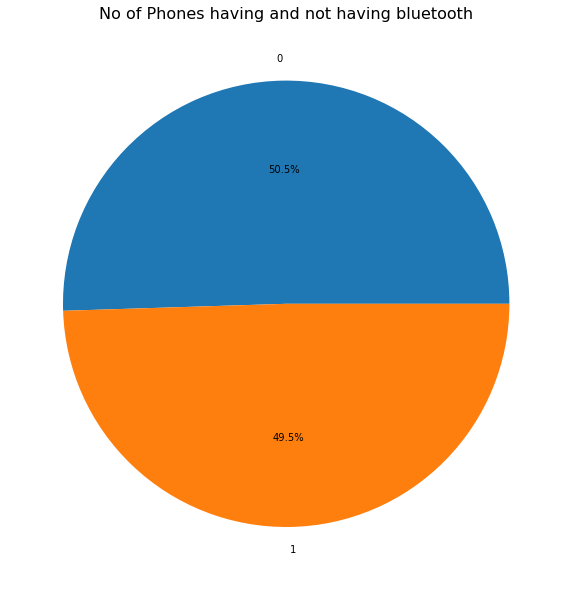

In [ ]:
plt.title('No of Phones having and not having bluetooth',fontsize=16)
df['blue'].value_counts().plot(kind='pie',autopct='%1.1f%%', figsize=(10,12)).set_ylabel('')
print(df['blue'].value_counts())

Phones having and not having bluetooth are nearly equal in number.

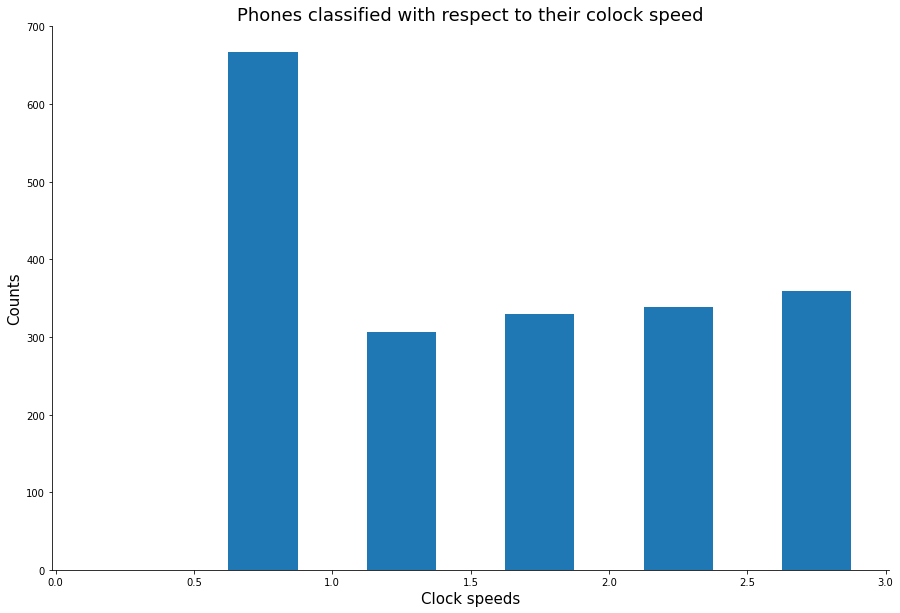

[0, 667, 306, 330, 338, 331, 28]


In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
clock=[0]*7
for i in df['clock_speed']:
  clock[int(i//0.5)]+=1
ax.set_title('Phones classified with respect to their colock speed',fontsize=18)
ax.set_xlabel('Clock speeds',fontsize=15)
ax.set_ylabel('Counts',fontsize=15)
ax.hist(df['clock_speed'],bins=[0.5*i for i in range(7)],rwidth=0.5)
sns.despine()
plt.show()
print(clock)


Phones having clock speed between 0.5 and 1.0 are sold the most.

1    1019
0     981
Name: dual_sim, dtype: int64


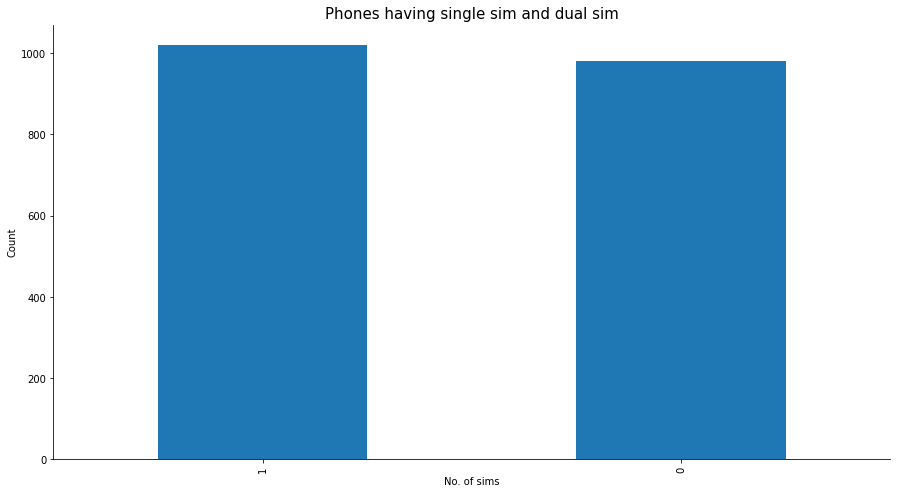

In [ ]:
#dual sim
plt.title('Phones having single sim and dual sim',fontsize=15)
df['dual_sim'].value_counts().plot(kind='bar',figsize=(15,8),sort_columns=True)
plt.xlabel('No. of sims',fontsize=10)
plt.ylabel('Count',fontsize=10)
print(df['dual_sim'].value_counts())
sns.despine()

Text(0, 0.5, '')

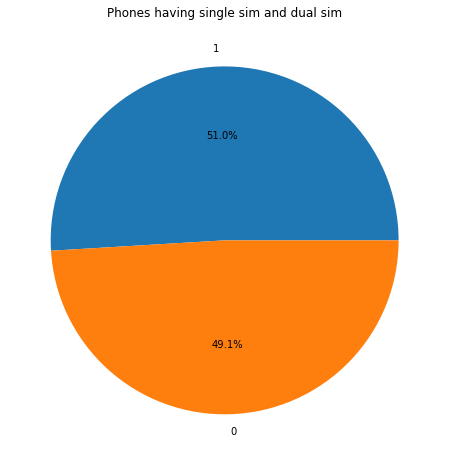

In [ ]:
plt.title('Phones having single sim and dual sim')
df['dual_sim'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(15,8)).set_ylabel('')

Phones having single sim and having double sim are nearly eual in number.

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64


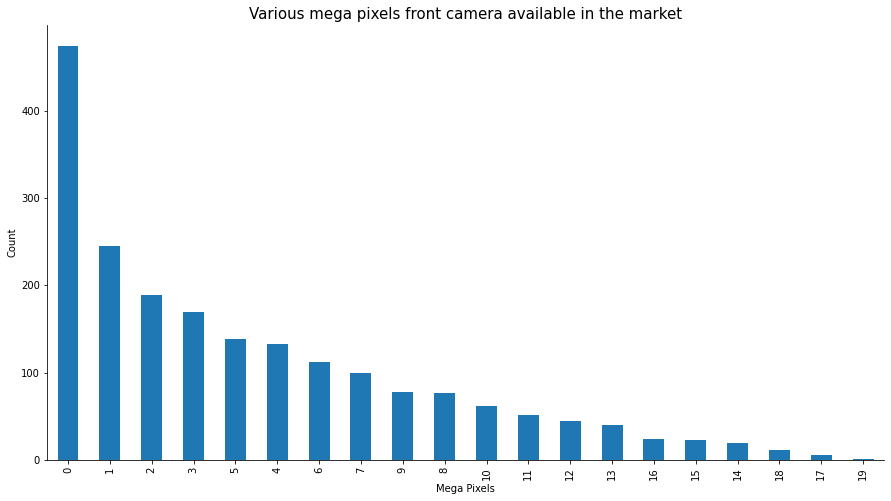

In [ ]:
#front camera
plt.title('Various mega pixels front camera available in the market',fontsize=15)
df['fc'].value_counts().plot(kind='bar',figsize=(15,8),sort_columns=True).set_xlabel('Mega Pixels')
plt.xlabel('Mega Pixels',fontsize=10)
plt.ylabel('Count',fontsize=10)
print(df['fc'].value_counts())
sns.despine()

Text(0, 0.5, '')

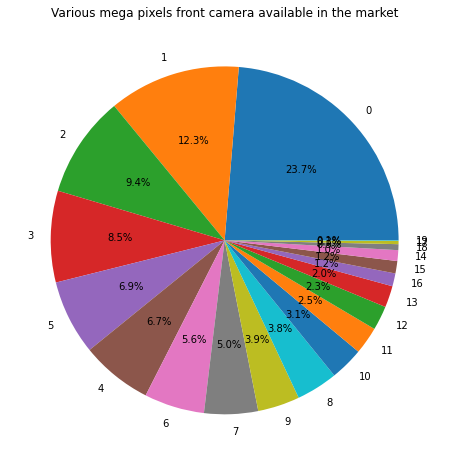

In [ ]:
plt.title('Various mega pixels front camera available in the market')
df['fc'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(15,8)).set_ylabel('')

Phones which are not having front camera are sold in max quantity.

1    1043
0     957
Name: four_g, dtype: int64


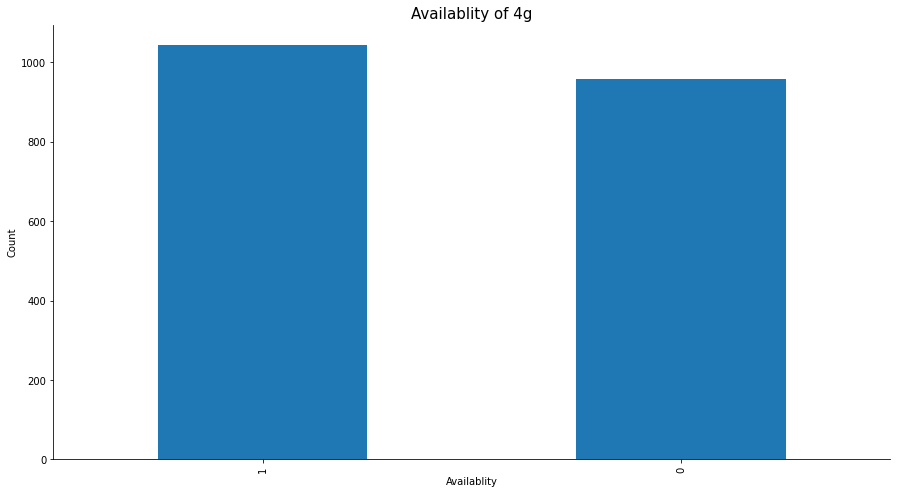

In [ ]:
#4 g
plt.title('Availablity of 4g',fontsize=15)
df['four_g'].value_counts().plot(kind='bar',sort_columns=True,figsize=(15,8))
plt.xlabel('Availablity',fontsize=10)
plt.ylabel('Count',fontsize=10)
print(df['four_g'].value_counts())
sns.despine()

Text(0, 0.5, '')

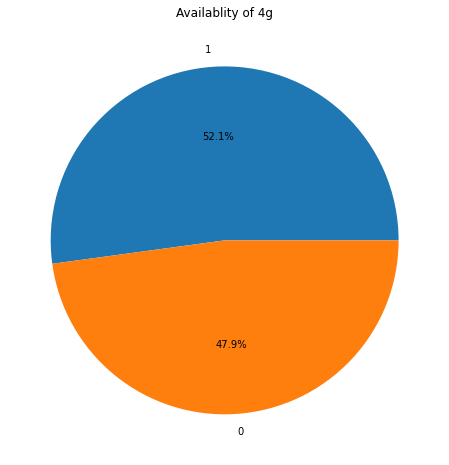

In [ ]:
plt.title('Availablity of 4g')
df['four_g'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(15,8)).set_ylabel('')

Phones having and not having 4g are nearly equal in number.

[272, 345, 310, 304, 320, 313, 136, 0]


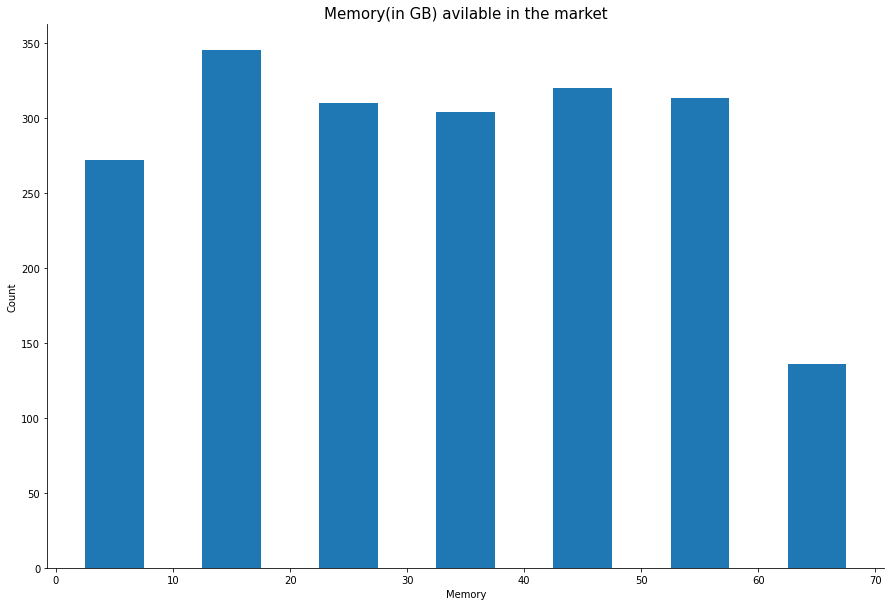

In [ ]:
#internal memory in gigabytes
fig,ax=plt.subplots(figsize=(15,10))
mem=[0]*8
for i in df['int_memory']:
  mem[int(i//10)]+=1
plt.title('Memory(in GB) avilable in the market',fontsize=15)
plt.hist(df['int_memory'],bins=[i*10 for i in range(8)],rwidth=0.5)
plt.xlabel('Memory',fontsize=10)
plt.ylabel('Count',fontsize=10)
print(mem)
sns.despine()
plt.show()

Phones with diffrent rams are available in the market.

0       0.6
1       0.7
2       0.9
3       0.8
4       0.6
       ... 
1995    0.8
1996    0.2
1997    0.7
1998    0.1
1999    0.9
Name: m_dep, Length: 2000, dtype: float64


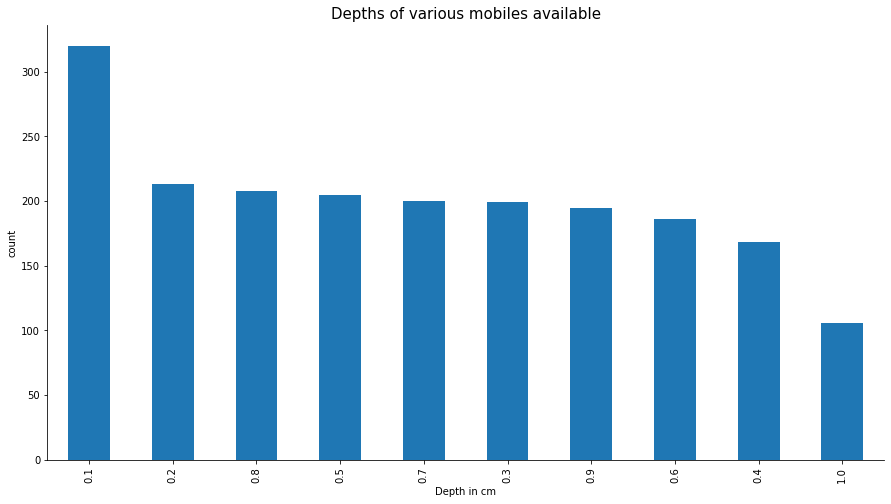

In [ ]:
#mobile depth
plt.title('Depths of various mobiles available',fontsize=15)
df['m_dep'].value_counts().plot(kind='bar',figsize=(15,8),sort_columns=True)
plt.xlabel('Depth in cm',fontsize=10)
plt.ylabel('count',fontsize=10)
print(df['m_dep'])
sns.despine()
plt.show()

Text(0, 0.5, '')

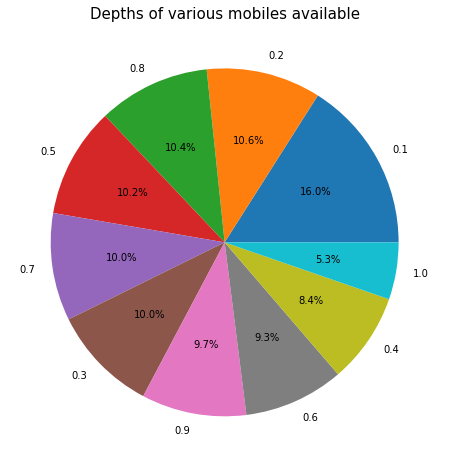

In [ ]:
plt.title('Depths of various mobiles available',fontsize=15)
df['m_dep'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(15,8)).set_ylabel('')

Phones with depth 0.1 are in high demand and phones with depth 1 are in least

[134, 194, 160, 148, 170, 159, 173, 168, 139, 176, 179, 200]


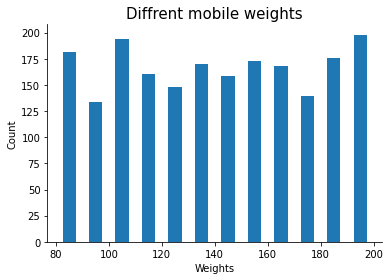

In [ ]:
#mobile weight
weight=[0]*12
for i in df['mobile_wt']:
  weight[int(i//10)-9]+=1
plt.title('Diffrent mobile weights',fontsize=15)
plt.hist(df['mobile_wt'],bins=[i*10 for i in range(8,21)],rwidth=0.5)
plt.xlabel('Weights',fontsize=10)
plt.ylabel('Count',fontsize=10)
print(weight)
sns.despine()

Phones are available with diffrent weights.

4    274
7    259
8    256
2    247
5    246
3    246
1    242
6    230
Name: n_cores, dtype: int64


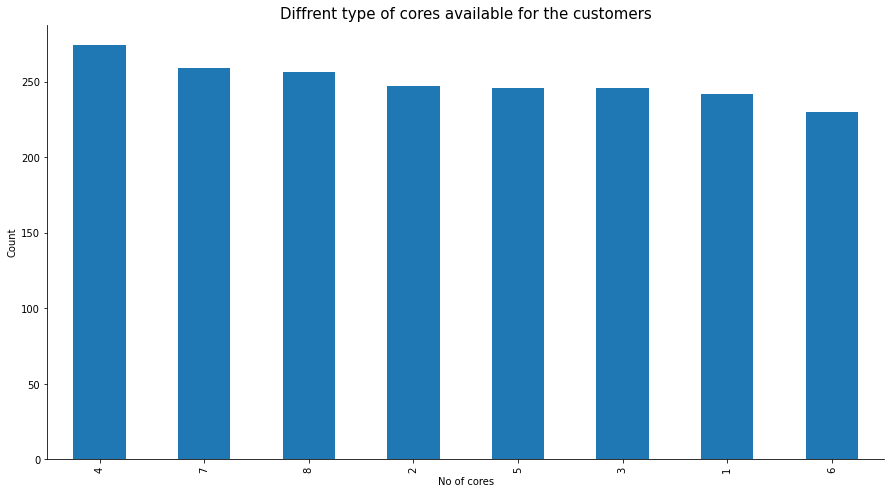

In [ ]:
#no of cores
plt.title('Diffrent type of cores available for the customers',fontsize=15)
df['n_cores'].value_counts().plot(kind='bar',figsize=(15,8),sort_columns=True)
plt.xlabel('No of cores',fontsize=10)
plt.ylabel('Count',fontsize=10)
print(df['n_cores'].value_counts())
sns.despine()
plt.show()

Text(0, 0.5, '')

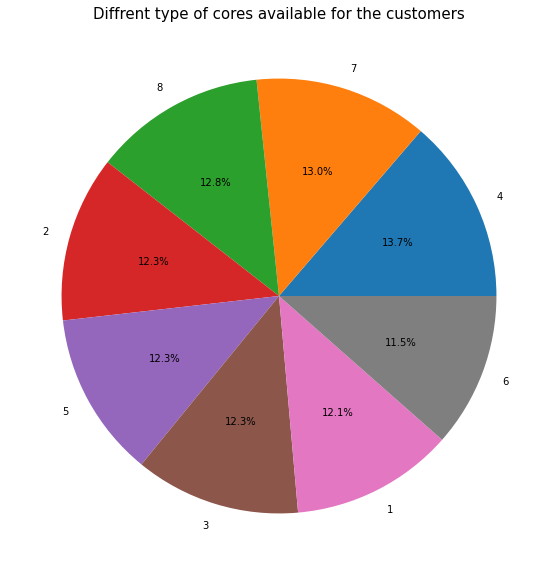

In [ ]:
plt.title('Diffrent type of cores available for the customers',fontsize=15)
df['n_cores'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(15,10)).set_ylabel('')

Core type 4 is mostly sold core , rest all are sold almost equally.

10    122
7     119
9     112
20    110
14    104
1     104
0     101
2      99
17     99
6      95
4      95
3      93
15     92
12     90
8      89
16     88
13     85
19     83
18     82
11     79
5      59
Name: pc, dtype: int64


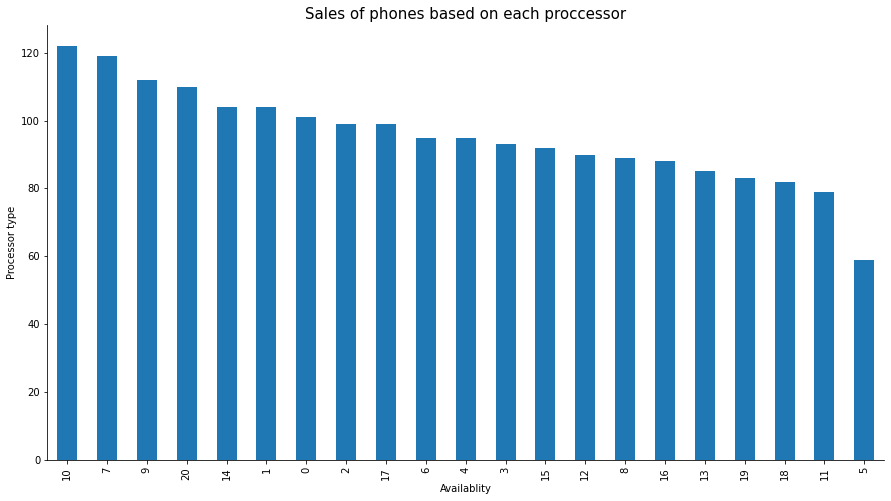

In [ ]:
#pc
plt.title('Sales of phones based on each proccessor',fontsize=15)
df['pc'].value_counts().plot(kind='bar',figsize=(15,8))
plt.xlabel('Availablity',fontsize=10)
plt.ylabel('Processor type',fontsize=10)
print(df['pc'].value_counts())
sns.despine()

Text(0, 0.5, '')

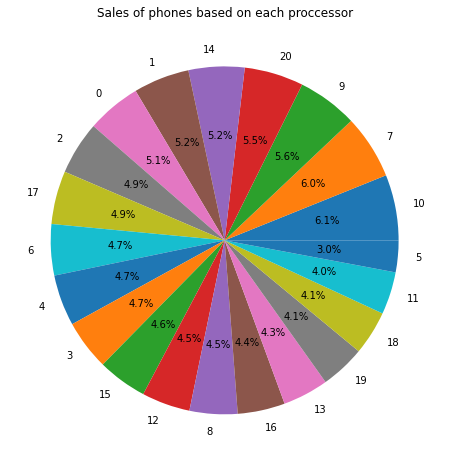

In [ ]:
plt.title('Sales of phones based on each proccessor')
df['pc'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(15,8)).set_ylabel('')

Type 7 and 10 are the most available proccessors in the market

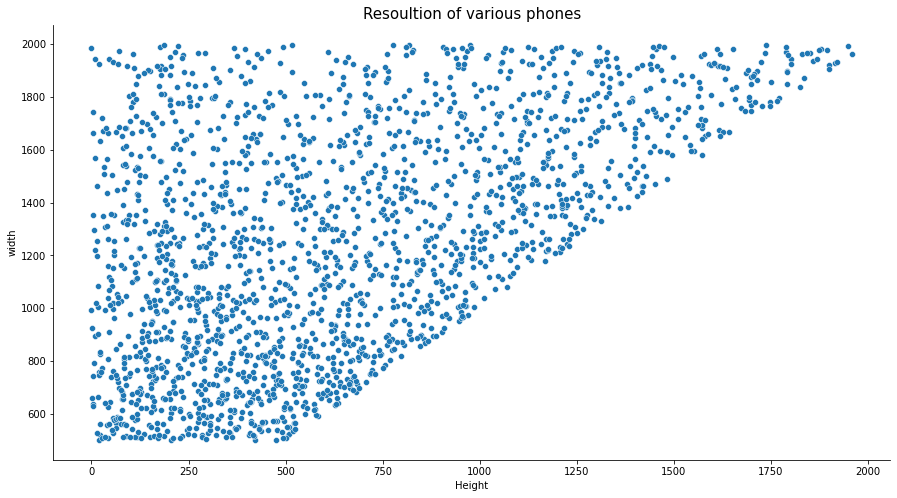

In [ ]:
#resolution (px_height,px_width)
plt.rcParams["figure.figsize"] = (15,8)
plt.title('Resoultion of various phones',fontsize=15)
plt.xlabel('Height',fontsize=10)
plt.ylabel('width',fontsize=10)
sns.scatterplot(x=df['px_height'],y=df['px_width'])
sns.despine()

Width of the phones are either equal to or less than the height.

In [ ]:
df['ram'].max()

3998

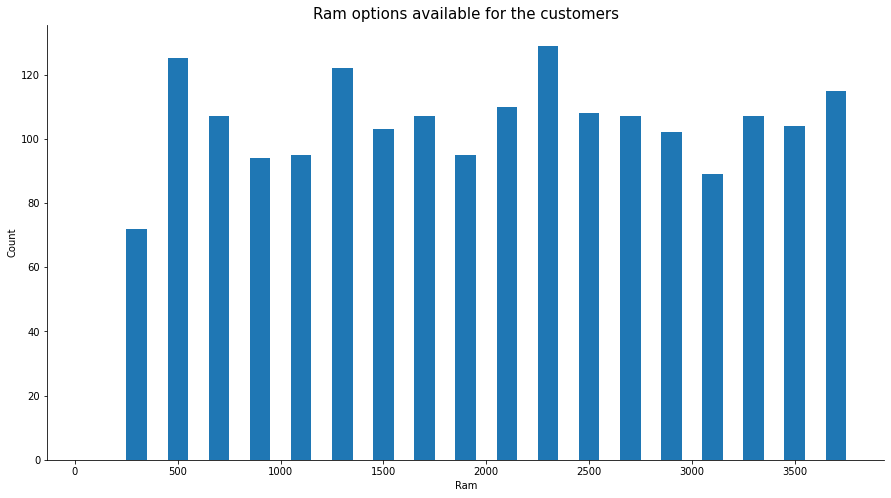

In [ ]:
plt.title('Ram options available for the customers',fontsize=15)
plt.xlabel('Ram',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.hist(df['ram'],bins=[i*200 for i in range(20)],rwidth=0.50)
sns.despine()

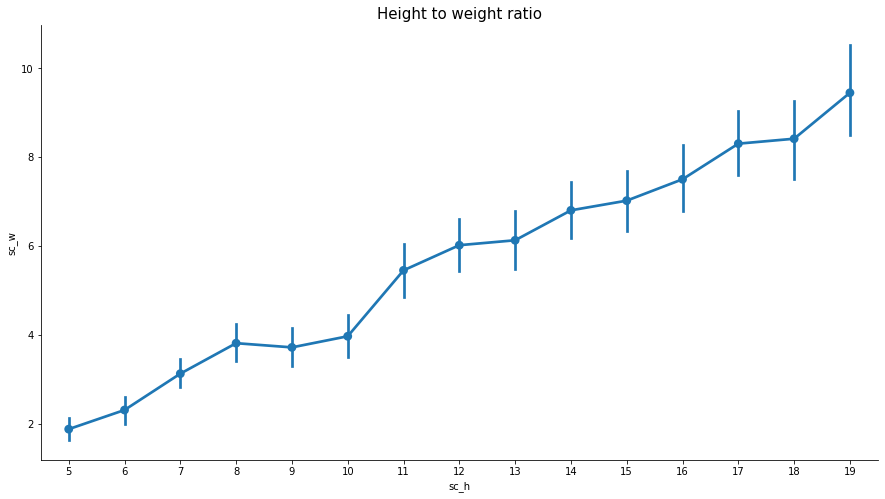

In [ ]:
#screen height and weight
plt.rcParams["figure.figsize"] = (15,8)
plt.title('Height to weight ratio',fontsize=15)
plt.xlabel('Height',fontsize=10)
plt.ylabel('width',fontsize=10)
sns.pointplot(x=df['sc_h'],y=df['sc_w'])
sns.despine()

We can see nearly linear increase in height as weight increases.

1    1523
0     477
Name: three_g, dtype: int64


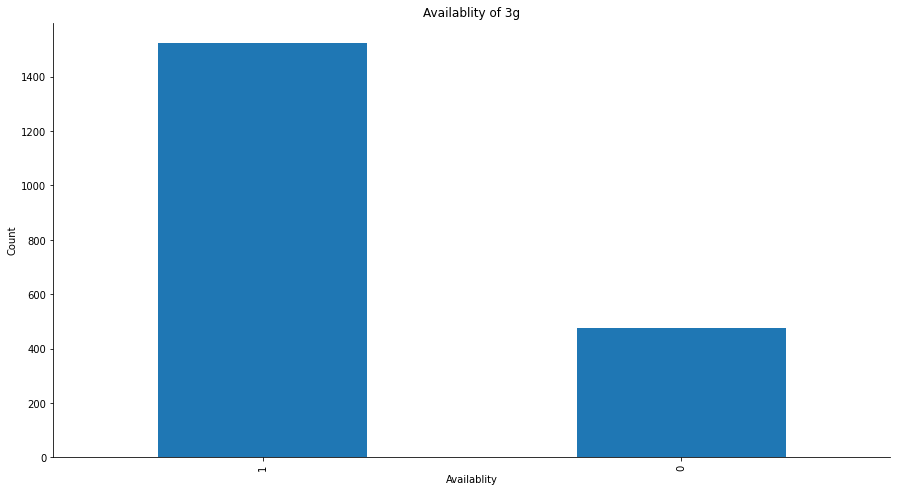

In [ ]:
#4 g
plt.title('Availablity of 3g')
df['three_g'].value_counts().plot(kind='bar',sort_columns=True,figsize=(15,8))
print(df['three_g'].value_counts())
plt.xlabel('Availablity',fontsize=10)
plt.ylabel('Count',fontsize=10)
sns.despine()

Text(0, 0.5, '')

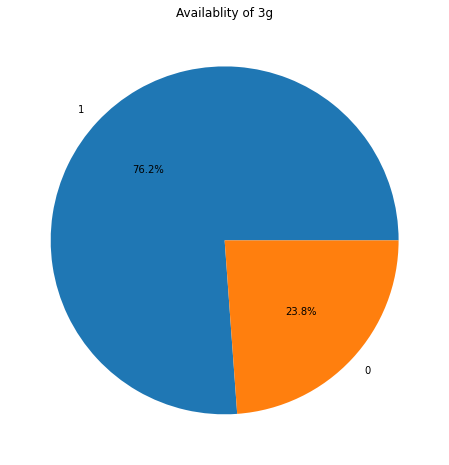

In [ ]:
plt.title('Availablity of 3g')
df['three_g'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(15,8)).set_ylabel('')

Most phones are available with 3g.

1    1006
0     994
Name: touch_screen, dtype: int64


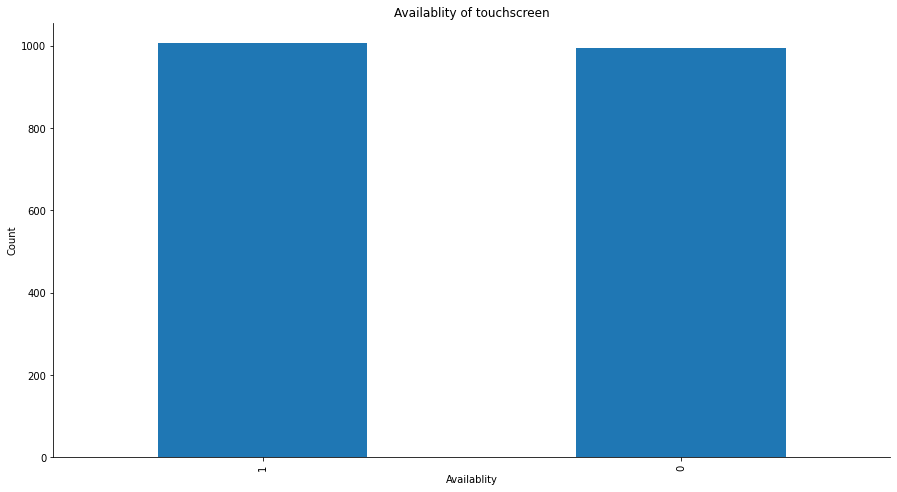

In [ ]:
#4 g
plt.title('Availablity of touchscreen')
df['touch_screen'].value_counts().plot(kind='bar',sort_columns=True,figsize=(15,8))
plt.xlabel('Availablity',fontsize=10)
plt.ylabel('Count',fontsize=10)
print(df['touch_screen'].value_counts())
sns.despine()

Text(0, 0.5, '')

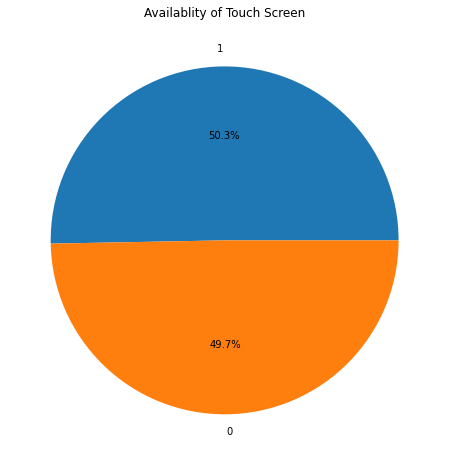

In [ ]:
plt.title('Availablity of Touch Screen')
df['touch_screen'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(15,8)).set_ylabel('')

Phones having and not having touchscreen are nearly equal in number.

1    1014
0     986
Name: wifi, dtype: int64


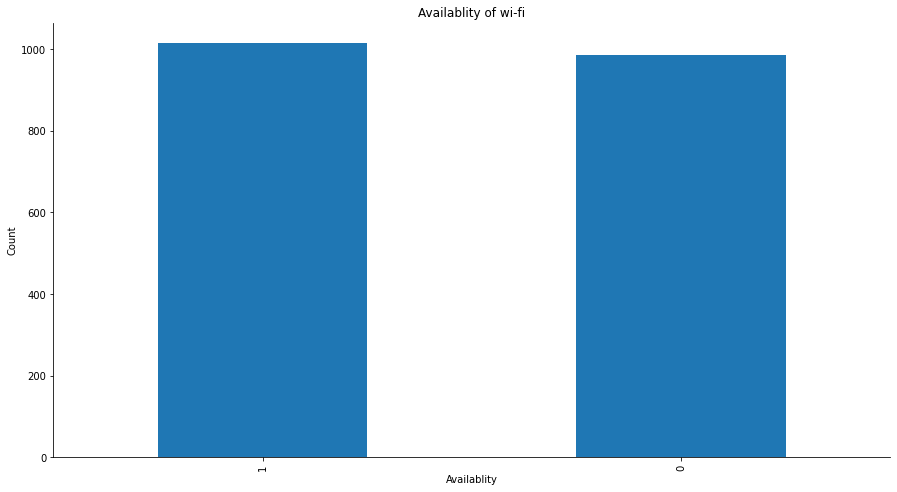

In [ ]:
#wifi
plt.title('Availablity of wi-fi')
df['wifi'].value_counts().plot(kind='bar',sort_columns=True,figsize=(15,8))
plt.xlabel('Availablity',fontsize=10)
plt.ylabel('Count',fontsize=10)
print(df['wifi'].value_counts())
sns.despine()

Text(0, 0.5, '')

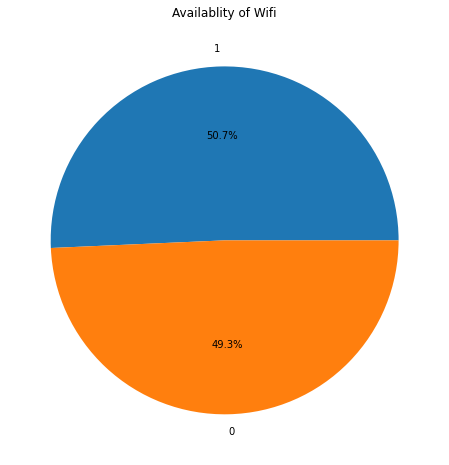

In [ ]:
plt.title('Availablity of Wifi')
df['wifi'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(15,8)).set_ylabel('')

Phones having and not having wi-fi are nearly eual in number.

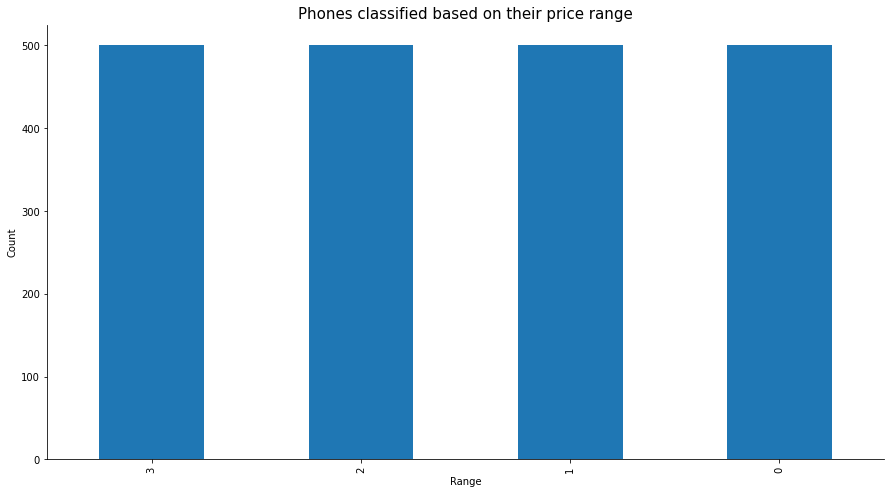

In [ ]:
plt.title('Phones classified based on their price range',fontsize=15)
df['price_range'].value_counts().plot(kind='bar',figsize=(15,8))
plt.xlabel('Range',fontsize=10)
plt.ylabel('Count',fontsize=10)
sns.despine()

For every price range we have same no of phones available in the market.

#Feature Selection

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df)
var_thres.get_support()
constant_columns=[column for column in df.columns if column not in df.columns[var_thres.get_support()]]
constant_columns

[]

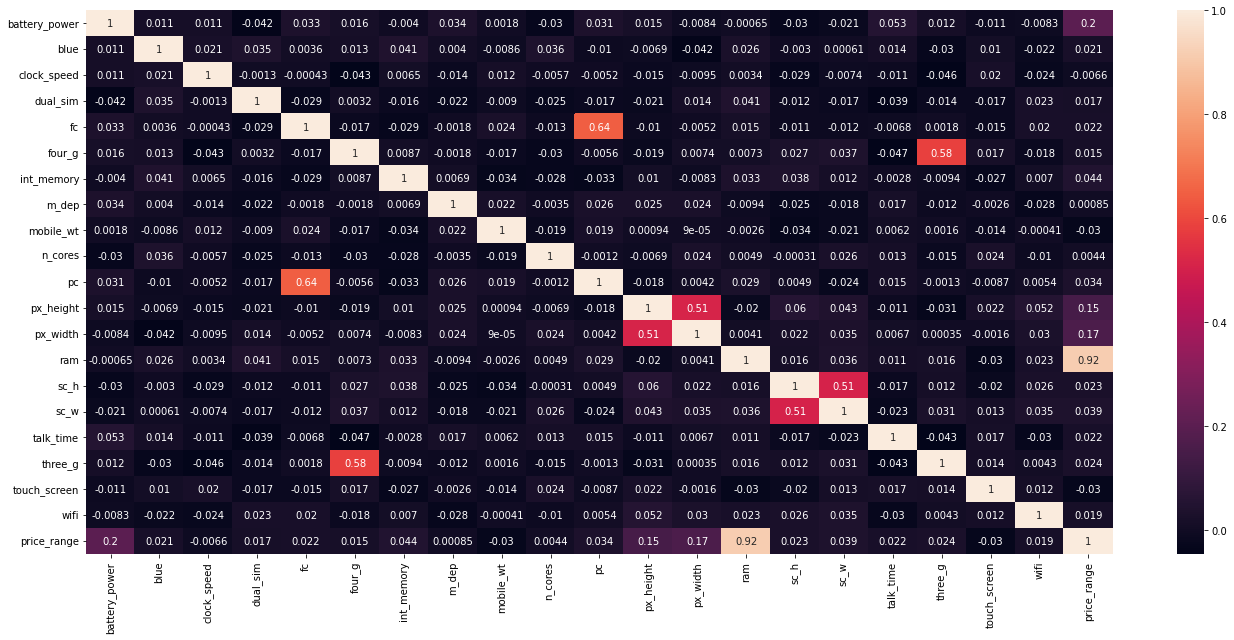

In [ ]:
plt.figure(figsize=[23,10])
sns.heatmap(df.corr(),annot=True)

Every column's correlations are less than 0.7 i.e no two columns are correlated.

#Pre-Processing

Genreally ,normalization is often used when the data given does not follows guassian distrbution.
Standardization is used when the data follow guassian distrbution.
Some models works good with normalized data while some with stadardized data.Some models like decision tree have not effect either the data normalized or not.
Here we are going to implement all  the three data's with the models.

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
X=df.drop(columns=['price_range'],axis=1)
Y=df[['price_range']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)
X_train_norm=norm.transform(X_train)
X_train_norm=pd.DataFrame(X_train_norm,columns=X.columns)

norm = MinMaxScaler().fit(X_test)
X_test_norm=norm.transform(X_test)
X_test_norm=pd.DataFrame(X_test_norm,columns=X.columns)
X_train_norm.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,0.488325,0.498571,0.415114,0.497857,0.228722,0.535000,0.485864,0.449444,0.490476,0.496122,0.493571,0.332312,0.501005,0.490163,0.517602,0.323333,0.495556,0.772143,0.511429,0.502857
std,0.293175,0.500177,0.328199,0.500174,0.227055,0.498952,0.294297,0.321627,0.294300,0.327421,0.303208,0.229741,0.287507,0.288190,0.301743,0.239494,0.304265,0.419600,0.500048,0.500171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.231438,0.000000,0.080000,0.000000,0.052632,0.000000,0.225806,0.111111,0.225000,0.142857,0.200000,0.149307,0.251502,0.242651,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000
50%,0.478261,0.000000,0.400000,0.000000,0.157895,1.000000,0.467742,0.444444,0.483333,0.428571,0.500000,0.287327,0.498999,0.495591,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000
75%,0.736622,1.000000,0.720000,1.000000,0.368421,1.000000,0.741935,0.777778,0.741667,0.857143,0.750000,0.486018,0.749166,0.728220,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_train_std=pd.DataFrame(X_train_std,columns=X.columns)

X_test_std = scaler.fit_transform(X_test)
X_test_std=pd.DataFrame(X_test_std,columns=X.columns)
X_train_std.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03
mean,1.629649e-16,-9.823888e-16,1.788599e-16,1.435360e-16,2.530119e-16,-1.046782e-17,-1.246622e-16,1.076916e-16,-1.310063e-16,2.049948e-16,-1.781115e-16,-1.015061e-17,9.135549e-17,6.960702e-17,-8.453555e-17,-1.622512e-16,4.425032e-17,-2.290231e-16,-1.533694e-16,-2.930989e-16
std,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00
min,-1.666237e+00,-9.971469e-01,-1.265276e+00,-9.957234e-01,-1.007703e+00,-1.072631e+00,-1.651520e+00,-1.397908e+00,-1.667179e+00,-1.515785e+00,-1.628413e+00,-1.446979e+00,-1.743205e+00,-1.701438e+00,-1.715986e+00,-1.350553e+00,-1.629279e+00,-1.840846e+00,-1.023124e+00,-1.005731e+00
25%,-8.765356e-01,-9.971469e-01,-1.021434e+00,-9.957234e-01,-7.758185e-01,-1.072631e+00,-8.839725e-01,-1.052319e+00,-9.023809e-01,-1.079319e+00,-9.685641e-01,-7.968537e-01,-8.681251e-01,-8.591551e-01,-7.687684e-01,-8.864456e-01,-8.986605e-01,5.432284e-01,-1.023124e+00,-1.005731e+00
50%,-3.433993e-02,-9.971469e-01,-4.606861e-02,-9.957234e-01,-3.120500e-01,9.322869e-01,-6.159964e-02,-1.555151e-02,-2.427931e-02,-2.063863e-01,2.120943e-02,-1.958786e-01,-6.981395e-03,1.884138e-02,-5.835536e-02,-1.902841e-01,1.461237e-02,5.432284e-01,9.773982e-01,9.943019e-01
75%,8.472266e-01,1.002861e+00,9.292971e-01,1.004295e+00,6.154871e-01,9.322869e-01,8.704229e-01,1.021216e+00,8.538222e-01,1.103013e+00,8.460207e-01,6.692797e-01,8.634532e-01,8.263384e-01,8.888621e-01,7.379311e-01,9.278852e-01,5.432284e-01,9.773982e-01,9.943019e-01
max,1.745911e+00,1.002861e+00,1.782742e+00,1.004295e+00,3.398098e+00,9.322869e-01,1.747621e+00,1.712394e+00,1.731924e+00,1.539479e+00,1.670832e+00,2.907297e+00,1.736210e+00,1.769732e+00,1.599275e+00,2.826415e+00,1.658504e+00,5.432284e-01,9.773982e-01,9.943019e-01


#Model Fitting

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
lg=LogisticRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.75      0.80      0.78       133
           1       0.52      0.54      0.53       145
           2       0.49      0.43      0.45       157
           3       0.73      0.75      0.74       165

    accuracy                           0.63       600
   macro avg       0.62      0.63      0.63       600
weighted avg       0.62      0.63      0.62       600



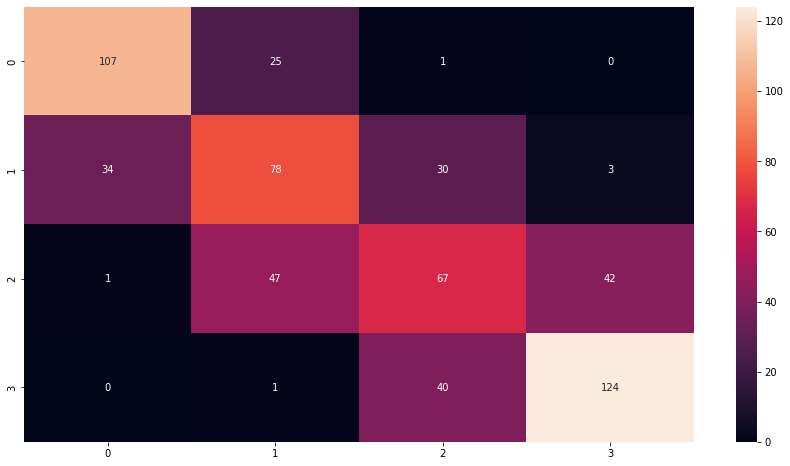

In [ ]:
#original data
lg.fit(X_train,Y_train)
Y_pred=lg.predict(X_test)
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='g')
print(classification_report(Y_test,Y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.93      0.96      0.94       133
           1       0.84      0.86      0.85       145
           2       0.88      0.80      0.84       157
           3       0.93      0.96      0.94       165

    accuracy                           0.90       600
   macro avg       0.89      0.90      0.89       600
weighted avg       0.89      0.90      0.89       600



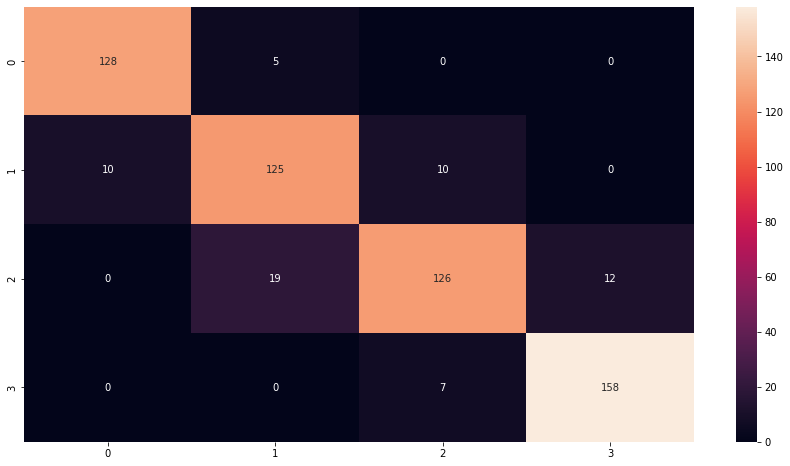

In [ ]:
#normalized data
lg.fit(X_train_norm,Y_train)
Y_pred=lg.predict(X_test_norm)
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='g')
print(classification_report(Y_test,Y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.89      1.00      0.94       133
           1       0.80      0.89      0.84       145
           2       0.83      0.80      0.81       157
           3       1.00      0.85      0.92       165

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



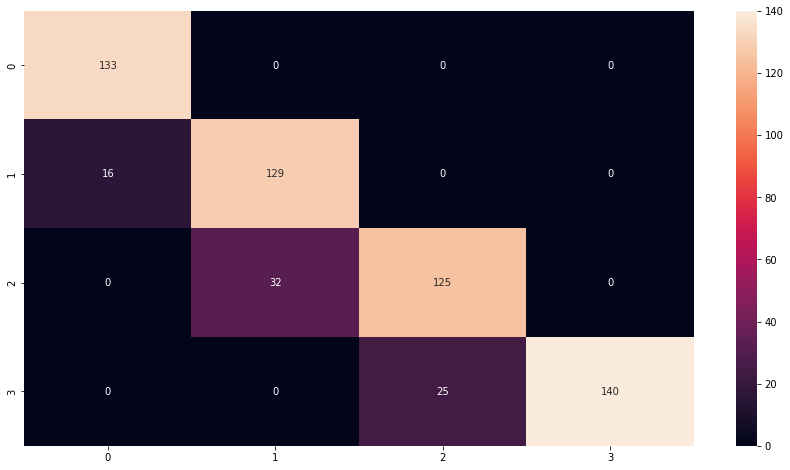

In [ ]:
#standardized data
lg.fit(X_train_std,Y_train)
Y_pred=lg.predict(X_test_std)
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='g')
print(classification_report(Y_test,Y_pred))

Logistic regression have certain effect in type of data and performs best when the data is standardized with overall accuracy above 90%. It performs poor when the orginal data (without normalization or standardization) with least accuracy of 62%.

##Decison Tree

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       133
           1       0.72      0.75      0.73       145
           2       0.73      0.68      0.70       157
           3       0.85      0.89      0.87       165

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.79      0.80      0.79       600



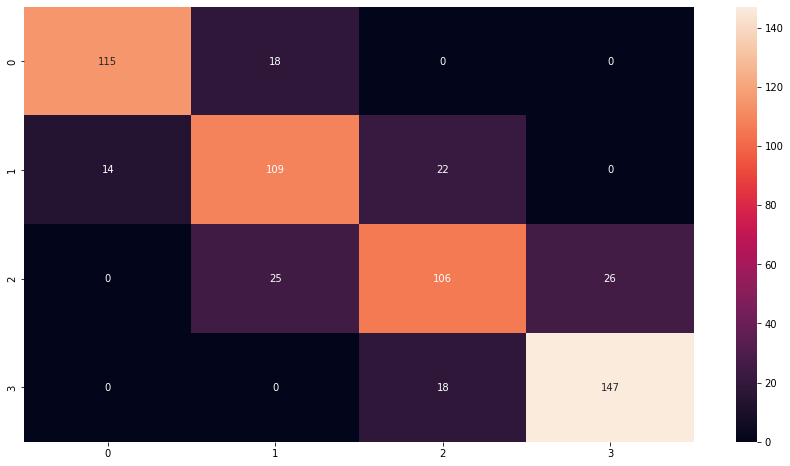

In [ ]:
#original data
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred=dt.predict(X_test)
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='g')
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       133
           1       0.68      0.75      0.71       145
           2       0.74      0.68      0.71       157
           3       0.86      0.90      0.88       165

    accuracy                           0.78       600
   macro avg       0.79      0.78      0.78       600
weighted avg       0.79      0.78      0.78       600



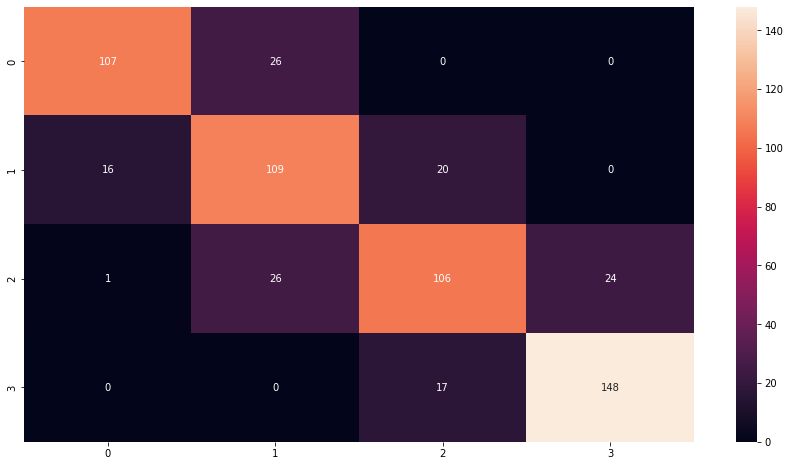

In [ ]:
#normalized data
dt=DecisionTreeClassifier()
dt.fit(X_train_norm,Y_train)
Y_pred=dt.predict(X_test_norm)
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='g')
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       133
           1       0.70      0.86      0.77       145
           2       0.76      0.62      0.69       157
           3       0.90      0.85      0.88       165

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.80       600



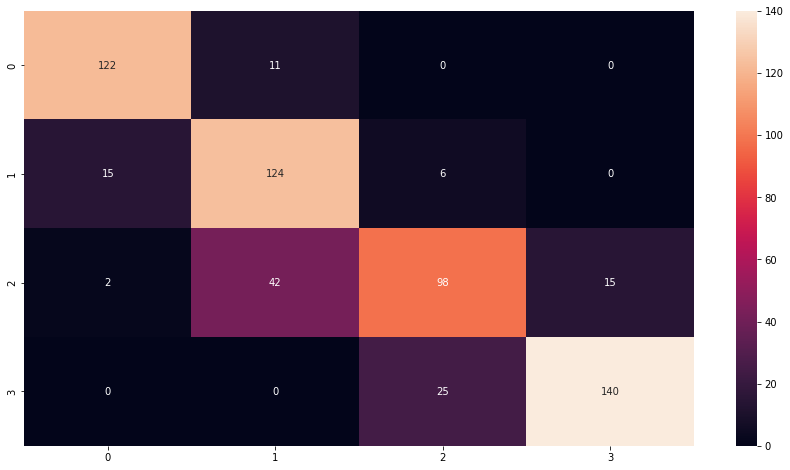

In [ ]:
#standardized data
dt.fit(X_train_std,Y_train)
Y_pred=dt.predict(X_test_std)
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='g')
print(classification_report(Y_test,Y_pred))

Decision tree performs almost same in all three data (slightly better in normalized data) 

##Random Forest Classifier

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.88      0.97      0.92       133
           1       0.78      0.80      0.79       145
           2       0.81      0.74      0.77       157
           3       0.92      0.91      0.91       165

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



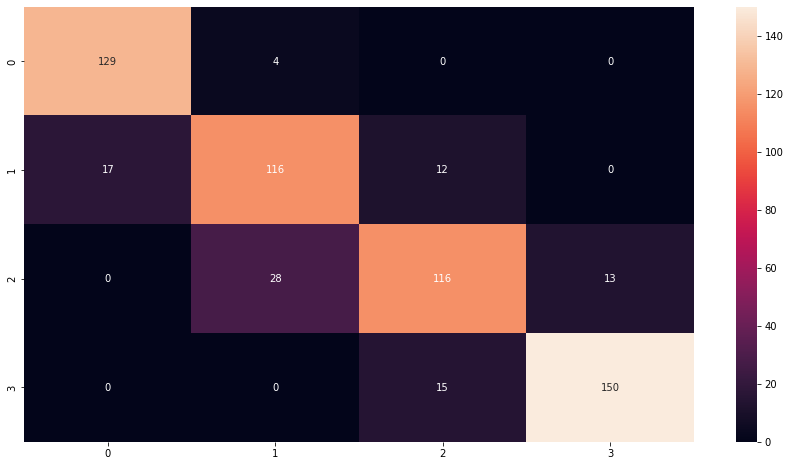

In [ ]:
#original data
rff=RandomForestClassifier()
rff.fit(X_train,Y_train)
Y_pred=rff.predict(X_test)
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='g')
print(classification_report(Y_test,Y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       133
           1       0.76      0.81      0.78       145
           2       0.83      0.68      0.74       157
           3       0.90      0.93      0.92       165

    accuracy                           0.84       600
   macro avg       0.84      0.85      0.84       600
weighted avg       0.84      0.84      0.84       600



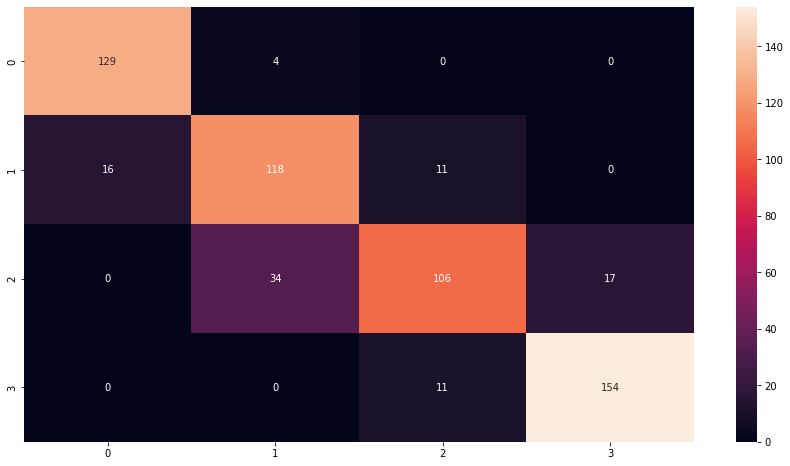

In [ ]:
#normalized data
rff=RandomForestClassifier()
rff.fit(X_train_norm,Y_train)
Y_pred=rff.predict(X_test_norm)
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='g')
print(classification_report(Y_test,Y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


              precision    recall  f1-score   support

           0       0.84      0.99      0.91       133
           1       0.74      0.79      0.76       145
           2       0.76      0.73      0.75       157
           3       0.99      0.81      0.89       165

    accuracy                           0.82       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.82      0.83       600



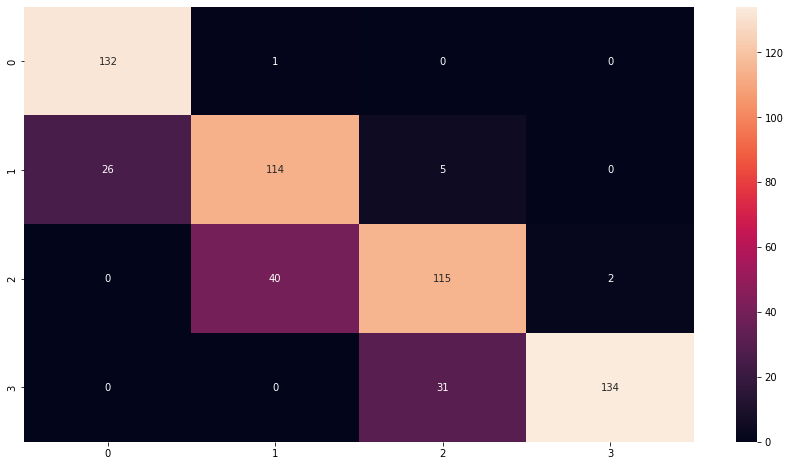

In [ ]:
#standardized data
rff.fit(X_train_std,Y_train)
Y_pred=rff.predict(X_test_std)
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='g')
print(classification_report(Y_test,Y_pred))

Like decision tree random gorest classifier also performs nearly same in all,with the best performnace above 85% in ortginal and normalized data

##K nearest neighbours

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       133
           1       0.89      0.92      0.90       145
           2       0.87      0.85      0.86       157
           3       0.93      0.92      0.93       165

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



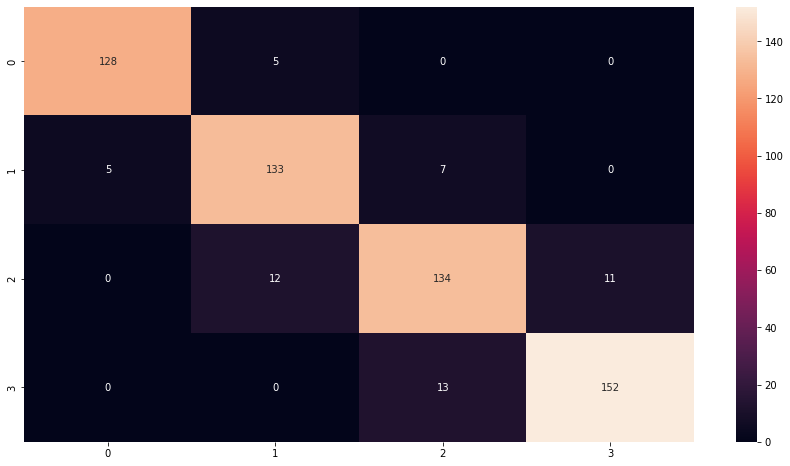

In [ ]:
#original data
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='g')
print(classification_report(Y_test,Y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.55      0.94      0.69       133
           1       0.40      0.34      0.36       145
           2       0.45      0.50      0.47       157
           3       0.91      0.42      0.57       165

    accuracy                           0.54       600
   macro avg       0.58      0.55      0.53       600
weighted avg       0.59      0.54      0.52       600



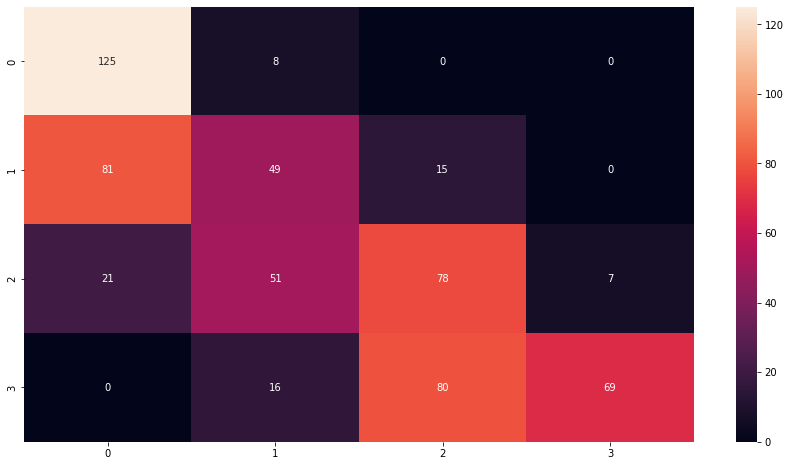

In [ ]:
#normalized data
knn=KNeighborsClassifier(n_neighbors=819)
knn.fit(X_train_norm,Y_train)
Y_pred=knn.predict(X_test_norm)
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='g')
print(classification_report(Y_test,Y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.53      0.98      0.69       133
           1       0.37      0.27      0.31       145
           2       0.45      0.48      0.46       157
           3       0.95      0.45      0.61       165

    accuracy                           0.53       600
   macro avg       0.57      0.54      0.52       600
weighted avg       0.58      0.53      0.52       600



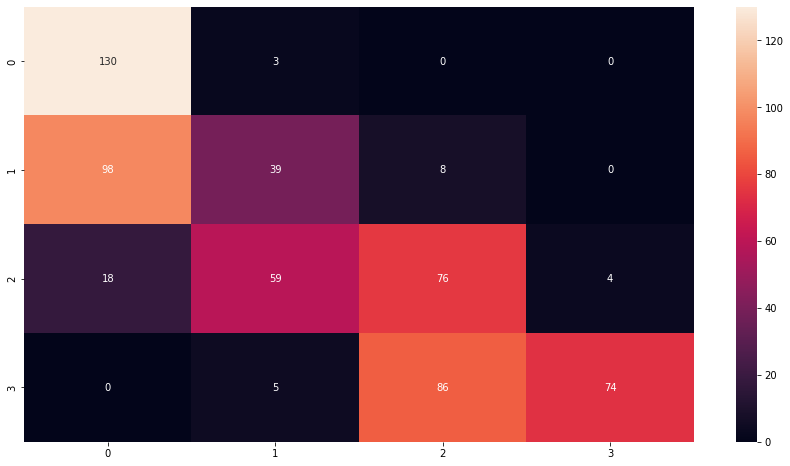

In [ ]:
#standardized data
knn.fit(X_train_std,Y_train)
Y_pred=knn.predict(X_test_std)
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='g')
print(classification_report(Y_test,Y_pred))

As we normalize and standardize the data our accuracy gets affected and become less. This is because of the change in euclidean distance.

##SVM

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       133
           1       0.97      0.96      0.97       145
           2       0.97      0.94      0.95       157
           3       0.96      0.99      0.98       165

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



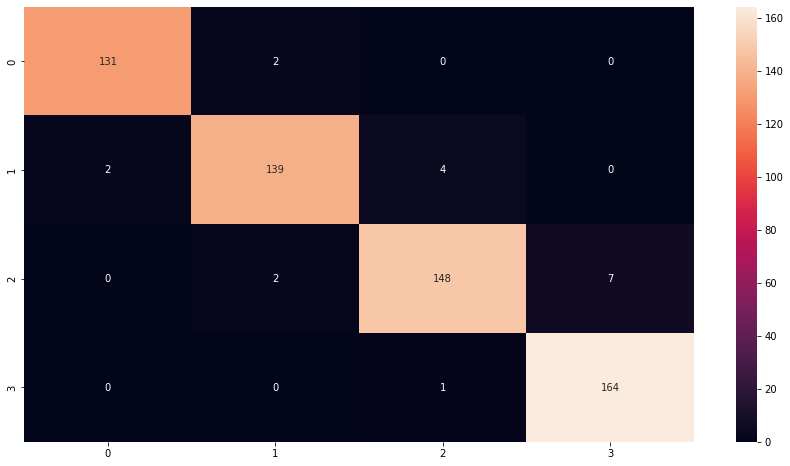

In [ ]:
#original data
svc=SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='g')
print(classification_report(Y_test,Y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       133
           1       0.88      0.92      0.90       145
           2       0.90      0.87      0.88       157
           3       0.95      0.93      0.94       165

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



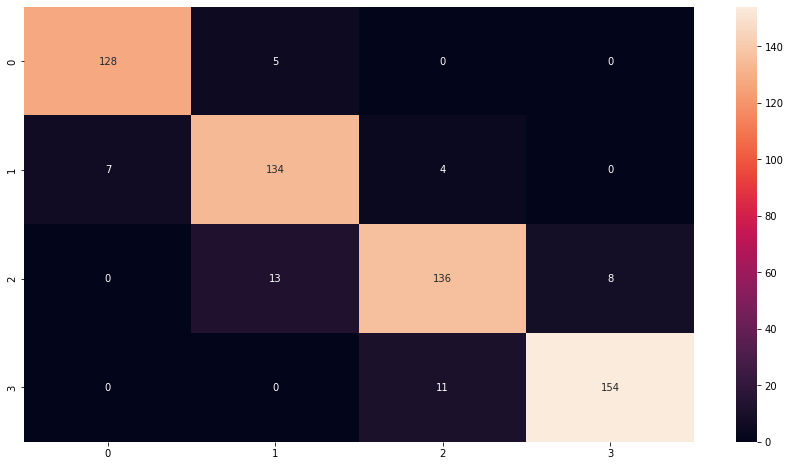

In [ ]:
#normalized data
svc=SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)
svc.fit(X_train_norm,Y_train)
Y_pred=svc.predict(X_test_norm)
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='g')
print(classification_report(Y_test,Y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.90      0.99      0.94       133
           1       0.81      0.90      0.85       145
           2       0.85      0.81      0.83       157
           3       1.00      0.87      0.93       165

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



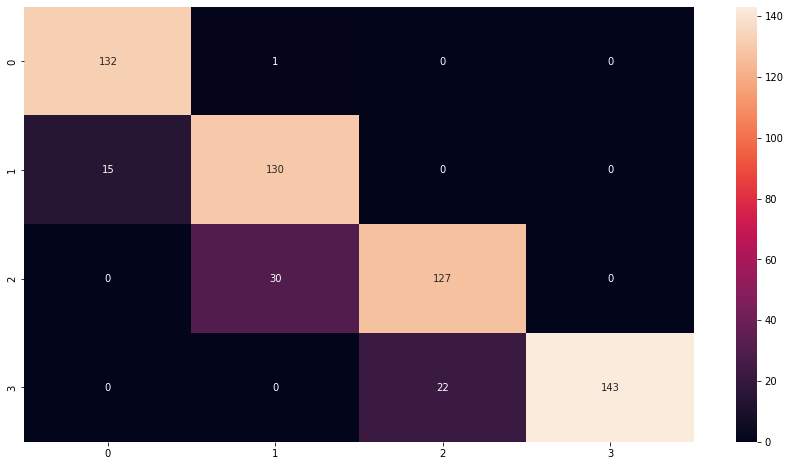

In [ ]:
#standardized data
svc=SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)
svc.fit(X_train_std,Y_train)
Y_pred=svc.predict(X_test_std)
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='g')
print(classification_report(Y_test,Y_pred))

Accuracy of svm decreses with noRmalized and standardized data.